In [148]:
import numpy as np
import pandas as pd

mu, sigma = 0, 1
n = 100
X = np.random.normal(mu, sigma, n)
noise = np.random.normal(mu, sigma, n)

y = X - 2 * pow(X, 2) + noise


Text(0.5, 1.0, 'X vs y')

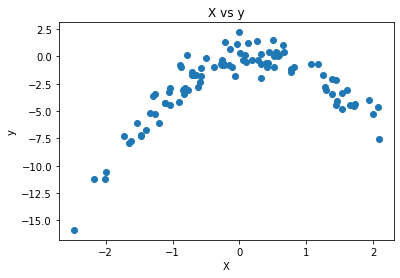

In [149]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y")

In [153]:
import sklearn.linear_model as skl_lm
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

predictors = pd.DataFrame(X, columns=['X'])
predictors = sm.add_constant(predictors)

linearModel = sm.OLS(y, predictors).fit()
print(linearModel.summary())
linearPredictions = linearModel.predict(predictors)


quadraticPredictors = pd.DataFrame(predictors)
quadraticPredictors['X^2'] = pow(X,2)
quadraticModel = sm.OLS(y, quadraticPredictors).fit()
print(quadraticModel.summary())
quadraticPredictions = quadraticModel.predict(quadraticPredictors)

cubicPredictors = pd.DataFrame(quadraticPredictors)
cubicPredictors['X^3'] = pow(X,3)
cubicModel = sm.OLS(y, cubicPredictors).fit()
print(cubicModel.summary())
cubicPredictions = cubicModel.predict(cubicPredictors)

quarticPredictors = pd.DataFrame(cubicPredictors)
quarticPredictors['X^4'] = pow(X,4)
quarticModel = sm.OLS(y, quarticPredictors).fit()
print(quarticModel.summary())
quarticPredictions = quarticModel.predict(quarticPredictors)


#we compute levarages since this speeds up calculations
sumX = 0
meanX = X.mean()
levarages = np.zeros(n)

#intermediate step
for i in range(n):
  sumX = sumX + pow((X[i] - meanX), 2)

#final step
for i in range (n):
  levarages[i] = 1/n + (X[i] - meanX)/sumX

#we can calculate LOOCV test error using levarage and formula (5.2)
CVs = np.zeros(4)

for i in range(n):
  CVs[0] = CVs[0] + pow((y[i] - linearPredictions[i])/(1-levarages[i]), 2)
  CVs[1] = CVs[1] + pow((y[i] - quadraticPredictions[i])/(1-levarages[i]), 2)
  CVs[2] = CVs[2] + pow((y[i] - cubicPredictions[i])/(1-levarages[i]), 2)
  CVs[3] = CVs[3] + pow((y[i] - quarticPredictions[i])/(1-levarages[i]), 2)

CVs[0] = CVs[0] / n
CVs[1] = CVs[1] / n
CVs[2] = CVs[2] / n
CVs[3] = CVs[3] / n


print(CVs)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     18.92
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           3.34e-05
Time:                        07:07:03   Log-Likelihood:                -246.17
No. Observations:                 100   AIC:                             496.3
Df Residuals:                      98   BIC:                             501.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4924      0.287     -8.691      0.0

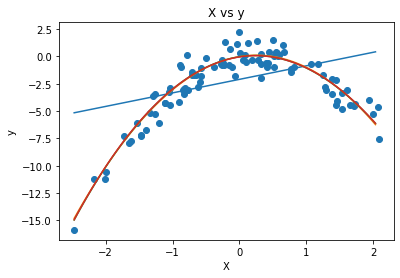

In [150]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y")

x = np.arange(min(X), max(X), (max(X) - min(X)) / n)
linY = linearModel.params[0] + linearModel.params[1]*x
quadY = quadraticModel.params[0] + quadraticModel.params[1]*x + quadraticModel.params[2]*pow(x,2)
cubeY = cubicModel.params[0] + cubicModel.params[1]*x + cubicModel.params[2]*pow(x,2) + cubicModel.params[3]*pow(x,3)
quarY = quarticModel.params[0] + quarticModel.params[1]*x + quarticModel.params[2]*pow(x,2) + quarticModel.params[3]*pow(x,3) + quarticModel.params[4]*pow(x,4)

plt.plot(x, linY)
plt.plot(x, quadY)
plt.plot(x, cubeY)
plt.plot(x, quarY)


0.9023225352138703


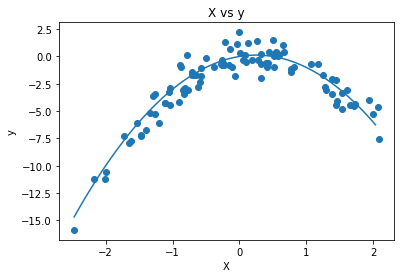

In [151]:
Yactual = x - 2 * pow(x, 2)

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y")
plt.plot(x, Yactual)

YactualPredictions = X - 2*pow(X,2)
TSS = 0
RSS = 0
meanY = y.mean()
for i in range(n):
  TSS = TSS + pow(y[i] - meanY, 2)
  RSS = RSS + pow(y[i] - YactualPredictions[i], 2)

Rsquared = 1 - RSS/TSS
print(Rsquared)